# Heart Disease Prediction

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

In [7]:
df = pd.read_csv(r"D:\documents\Data Analysis With Python\Machine Learning\ML_Project\archive (6)\Heart_Disease_Prediction.csv")

print("Dataset Preview:")
print(df.head())

Dataset Preview:
   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence  
2           

In [8]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(

In [9]:
print("\nMissing Values:")
print(df.isnull().sum().sum())


Missing Values:
0


In [10]:
df.drop_duplicates(inplace=True)

In [28]:
label_encoder = LabelEncoder()
df["Heart Disease"] = label_encoder.fit_transform(df["Heart Disease"])

# Verify encoding
print("\nUnique values in 'Heart Disease' after encoding:")
print(df["Heart Disease"].unique())


Unique values in 'Heart Disease' after encoding:
[1 0]


# EDA

C:\Users\AIMS TECH\AppData\Local\Temp\ipykernel_12248\1077686285.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Heart Disease', data=df, palette='coolwarm')


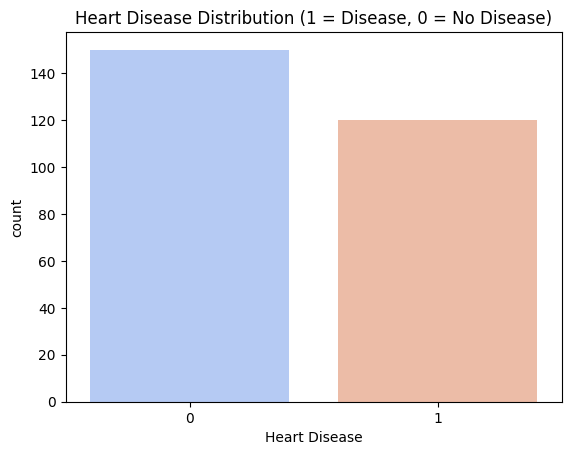

In [29]:
sns.countplot(x='Heart Disease', data=df, palette='coolwarm')
plt.title("Heart Disease Distribution (1 = Disease, 0 = No Disease)")
plt.show()

In [12]:
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
              Age         Sex  Chest pain type          BP  Cholesterol  \
count  270.000000  270.000000       270.000000  270.000000   270.000000   
mean    54.433333    0.677778         3.174074  131.344444   249.659259   
std      9.109067    0.468195         0.950090   17.861608    51.686237   
min     29.000000    0.000000         1.000000   94.000000   126.000000   
25%     48.000000    0.000000         3.000000  120.000000   213.000000   
50%     55.000000    1.000000         3.000000  130.000000   245.000000   
75%     61.000000    1.000000         4.000000  140.000000   280.000000   
max     77.000000    1.000000         4.000000  200.000000   564.000000   

       FBS over 120  EKG results      Max HR  Exercise angina  ST depression  \
count    270.000000   270.000000  270.000000       270.000000      270.00000   
mean       0.148148     1.022222  149.677778         0.329630        1.05000   
std        0.355906     0.997891   23.165717         0.470952 

# Label Encoding 

In [14]:
# Convert categorical columns to numeric using label encoding
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])


# Correlation Heatmap

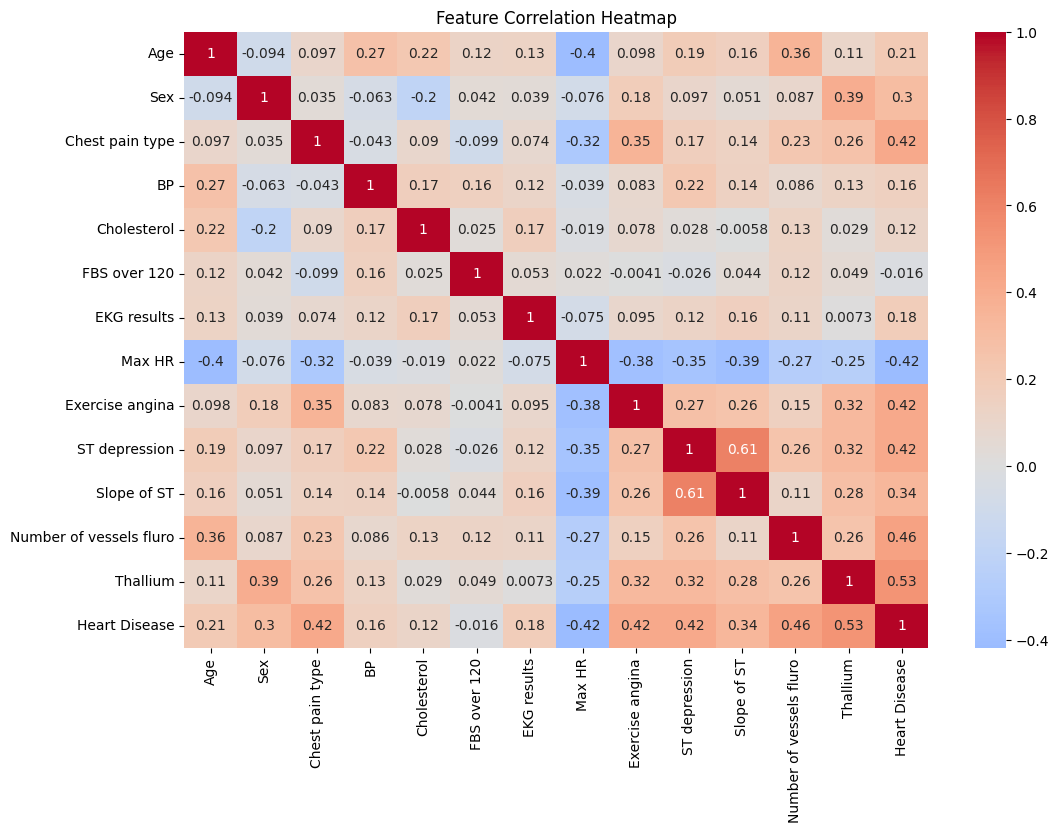

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

In [31]:
X = df.drop("Heart Disease", axis=1)
y = df["Heart Disease"]

print("\nFeature Columns:", X.columns.tolist())
print("Target Column: Heart Disease")


Feature Columns: ['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium']
Target Column: Heart Disease


# Split Data

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (216, 13)
Testing set size: (54, 13)


# Feature Scaling

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
X.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium'],
      dtype='object')

# Model Training

In [35]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=150, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n -> {name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


 -> Logistic Regression Accuracy: 0.9074
              precision    recall  f1-score   support

           0       0.91      0.94      0.93        33
           1       0.90      0.86      0.88        21

    accuracy                           0.91        54
   macro avg       0.91      0.90      0.90        54
weighted avg       0.91      0.91      0.91        54


 -> Random Forest Accuracy: 0.8148
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        33
           1       0.79      0.71      0.75        21

    accuracy                           0.81        54
   macro avg       0.81      0.80      0.80        54
weighted avg       0.81      0.81      0.81        54


 -> SVM Accuracy: 0.8889
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        33
           1       0.89      0.81      0.85        21

    accuracy                           0.89        54
   macro avg       0.89 

# Model Comparison

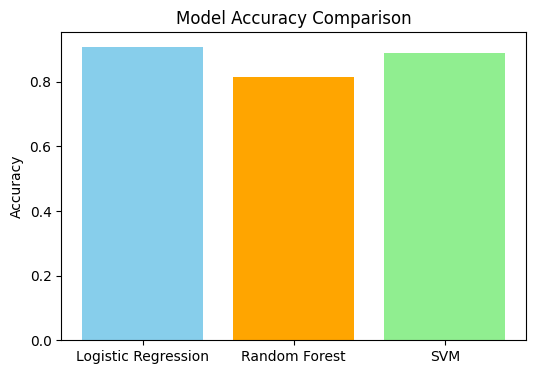

In [36]:
plt.figure(figsize=(6,4))
plt.bar(results.keys(), results.values(), color=['skyblue', 'orange', 'lightgreen'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()


# Confusion Matrix


Best Model: Logistic Regression


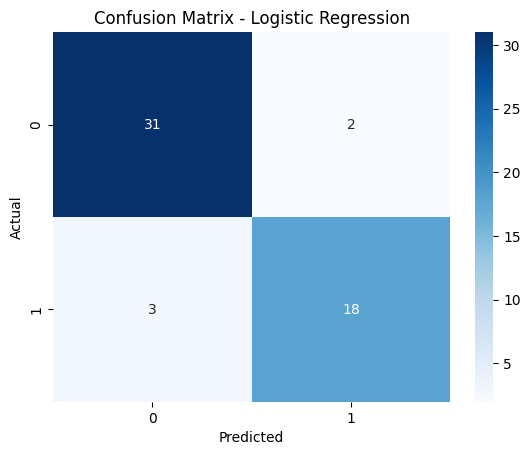

In [37]:
best_model_name = max(results, key=results.get)
print(f"\nBest Model: {best_model_name}")

best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [38]:
joblib.dump(best_model, "heart_disease_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("\nModel training complete & files saved successfully!")


Model training complete & files saved successfully!
